In [22]:
import pathlib

import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [23]:
def read_mqt_predictor_file(num_qubits: int, device: str) -> list[float]:
    best_res = [1.0]
    for file in pathlib.Path("results/").glob(f"mqt_predictor_{num_qubits}_qubits*"):
        found_device = False
        with pathlib.Path(file).open() as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith("Device:") and line.split(":")[1].strip() == device:
                    found_device = True
                if line.startswith("evaluation_data:") and found_device:
                    eval_data = eval(line.split(":")[1])
                    if min(eval_data) < min(best_res):
                        best_res = eval_data
    return best_res


def read_baseline_date(path: str) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    data_baseline = np.loadtxt(path)
    sorted_data = sorted(data_baseline, key=lambda x: min(x))
    best_run = sorted_data[0]
    worst_run = sorted_data[-1]
    median_run = sorted_data[len(sorted_data) // 2]
    return best_run, worst_run, median_run


def generate_eval_plot(
    best_run_O3: np.ndarray,
    worst_run_O3: np.ndarray,
    median_run_O3: np.ndarray,
    median_run_O0,
    mqt_predictor: list[float],
    device: str,
    num_qubits: int,
):
    for run in [best_run_O3, worst_run_O3, median_run_O3, median_run_O0, mqt_predictor]:
        local_min = 1
        for i in range(len(run)):
            run[i] = min(run[i], local_min)
            local_min = min(run[i], local_min)

    colors = ["#D81B60", "#FFC107", "#004D40", "#C6E5AA", "#0065bd"]

    linewidth = 2.5
    if len(median_run_O0) != 0:
        plt.plot(median_run_O0, label="Qiskit O0 median", color=colors[0], linewidth=linewidth)
    if len(worst_run_O3) != 0:
        plt.plot(worst_run_O3, label="Qiskit O3 worst", color=colors[1], linewidth=linewidth)
    if len(median_run_O3) != 0:
        plt.plot(median_run_O3, label="Qiskit O3 median", color=colors[2], linewidth=linewidth)
    if len(best_run_O3) != 0:
        plt.plot(best_run_O3, label="Qiskit O3 best", color=colors[3], linewidth=linewidth)
    if len(mqt_predictor) != 0:
        plt.plot(mqt_predictor, label="Proposed Approach", color=colors[4], linewidth=linewidth)
    plt.title(f"Evaluation for {num_qubits} qubits on {device}")
    plt.ylabel("KL Divergence")
    plt.xlabel("Episodes")
    plt.yscale("log")
    plt.legend()
    plt.savefig(f"results/{num_qubits}_qubits_{device}.pdf", bbox_inches="tight")

# 4 Qubits

0.25944203268842153 0.2794684504584817 0.2766165298673101
Diff to Worst:  0.32540749270245706
Diff to Mean:  0.09594418178113906
Diff to Best:  0.06208774720414212


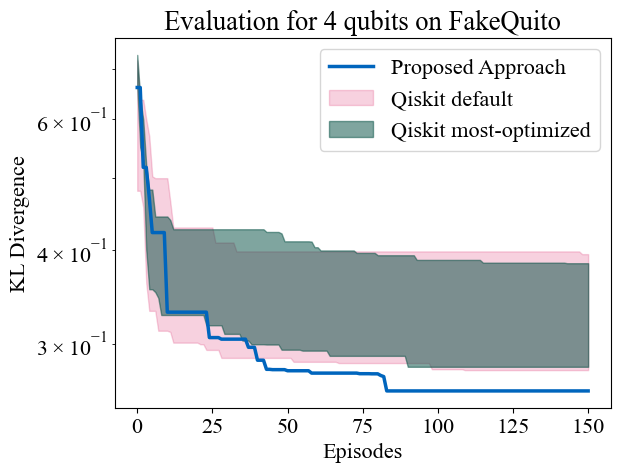

In [24]:
best_run_O3, worst_run_O3, median_run_O3 = read_baseline_date("results/O3/all_eval_data_fake_quito_4_qubits.txt")
_, _, median_run_O0 = read_baseline_date("results/O0/all_eval_data_fake_quito_4_qubits.txt")
mqt_predictor_4_qubits = read_mqt_predictor_file(num_qubits=4, device="ibm_quito")

print(min(mqt_predictor_4_qubits), min(best_run_O3))
generate_eval_plot(best_run_O3, worst_run_O3, median_run_O3, median_run_O0, mqt_predictor_4_qubits, "FakeQuito", 4)
print("Diff: ", 1 - min(mqt_predictor_4_qubits) / min(best_run_O3))

# 6 Qubits

0.09012326781111815 0.09821009005180642 0.09822006709112469
Diff to Worst:  0.22935887380865083
Diff to Mean:  0.13299882296816623
Diff to Best:  0.08234207133322469


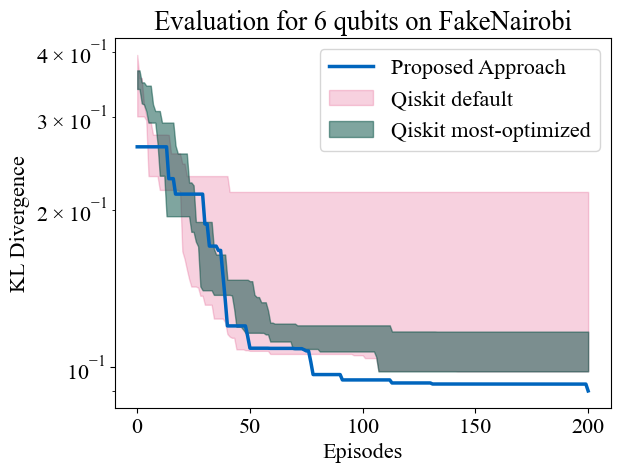

In [25]:
best_run_O3, worst_run_O3, median_run_O3 = read_baseline_date("results/O3/all_eval_data_fake_nairobi_6_qubits.txt")
_, _, median_run_O0 = read_baseline_date("results/O0/all_eval_data_fake_nairobi_6_qubits.txt")
mqt_predictor_6_qubits = read_mqt_predictor_file(num_qubits=6, device="ibm_nairobi")

print(min(mqt_predictor_6_qubits), min(best_run_O3))
generate_eval_plot(best_run_O3, worst_run_O3, median_run_O3, median_run_O0, mqt_predictor_6_qubits, "FakeNairobi", 6)
print("Diff: ", 1 - min(mqt_predictor_6_qubits) / min(best_run_O3))

# 8 Qubits Montreal

In [26]:
best_run_O3, worst_run_O3, median_run_O3 = read_baseline_date("results/O3/all_eval_data_fake_montreal_8_qubits.txt")
_, _, median_run_O0 = read_baseline_date("results/O0/all_eval_data_fake_montreal_8_qubits.txt")
mqt_predictor_8_qubits_montreal = read_mqt_predictor_file(num_qubits=8, device="ibm_montreal")

print(min(mqt_predictor_8_qubits_montreal), min(best_run_O3))
generate_eval_plot(
    best_run_O3, worst_run_O3, median_run_O3, median_run_O0, mqt_predictor_8_qubits_montreal, "FakeMontreal", 8
)
print("Diff: ", 1 - min(mqt_predictor_8_qubits_montreal) / min(best_run_O3))

FileNotFoundError: results/O1/all_eval_data_fake_montreal_8_qubits.txt not found.

# 10 Qubits Montreal

In [ ]:
best_run_O3, worst_run_O3, median_run_O3 = read_baseline_date("results/O3/all_eval_data_fake_montreal_10_qubits.txt")
mqt_predictor_10_qubits_montreal = []
median_run_O0 = []
# print(min(mqt_predictor_10_qubits_montreal), min(best_run_O3))
generate_eval_plot(
    best_run_O3, worst_run_O3, median_run_O3, median_run_O0, mqt_predictor_10_qubits_montreal, "FakeMontreal", 10
)
# print("Diff: ", 1 - min(mqt_predictor_10_qubits_montreal) / min(best_run_O3))